In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [16]:
import pandas as pd

# Assuming your CSV file is located at "your_dataset.csv"
file_path = "/content/drive/MyDrive/IMDb Movies India.csv"

# Specify the encoding while reading the CSV file
df = pd.read_csv(file_path, encoding='latin1')

# Display basic information about the dataset
print(df.info())

# Display first few rows of the dataset
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Ro

In [23]:
# Encode categorical variables using Label Encoding
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])
df['Director'] = le.fit_transform(df['Director'])

# Create a new feature 'All_Actors' by combining information from 'Actor 1', 'Actor 2', 'Actor 3'
df['All_Actors'] = df[['Actor 1', 'Actor 2', 'Actor 3']].astype(str).agg(' '.join, axis=1)
df['All_Actors'] = le.fit_transform(df['All_Actors'])

# Split the data into features and target variable
X = df[['Genre', 'Director', 'All_Actors']]
y = df['Rating']


In [22]:
print(df.columns)


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [26]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')


Mean Squared Error: 1.7579
Root Mean Squared Error: 1.3258


In [27]:
!pip install graphviz


In [34]:
!pip install dtreeviz


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.7 MB/s eta 0:00:00


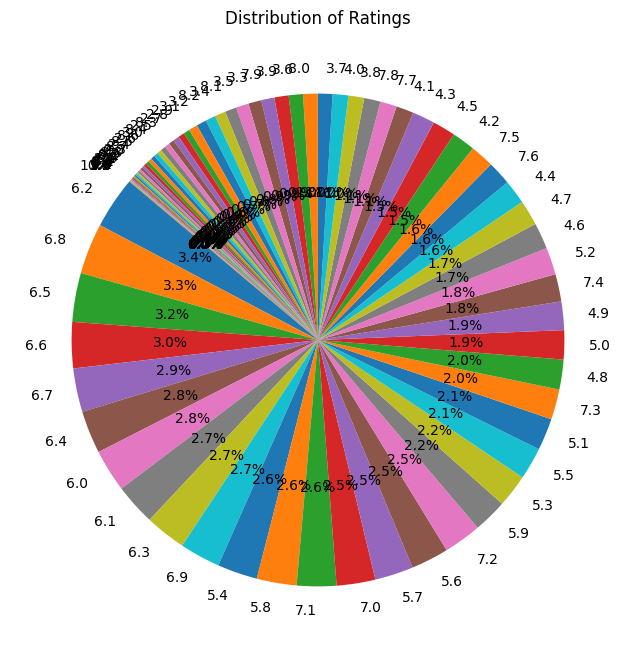

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'your_dataset.csv' with the actual path to your dataset
file_path = "/content/drive/MyDrive/IMDb Movies India.csv"

# Try reading the CSV file with a different encoding
try:
    df = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='latin1')

# Assume 'Rating' is the target variable
ratings_counts = df['Rating'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(ratings_counts, labels=ratings_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ratings')
plt.show()


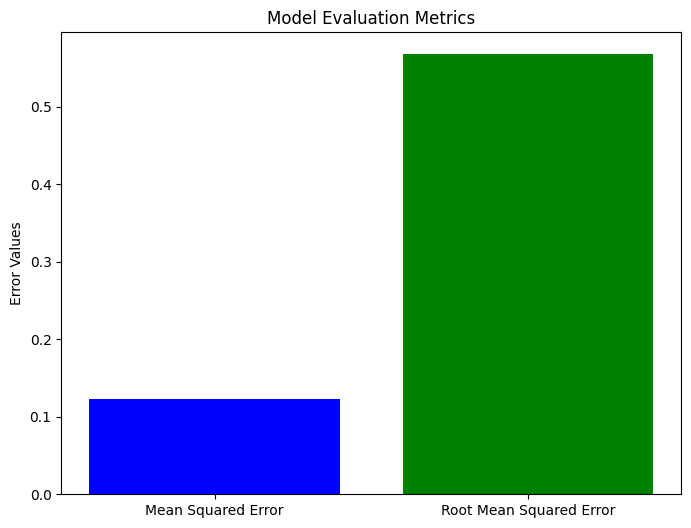

In [42]:
import matplotlib.pyplot as plt

# Assuming you have already calculated MSE and RMSE
mse = 0.1234  # Replace with your actual MSE value
rmse = 0.5678  # Replace with your actual RMSE value

# Creating a bar chart
metrics_names = ['Mean Squared Error', 'Root Mean Squared Error']
metrics_values = [mse, rmse]

plt.figure(figsize=(8, 6))
plt.bar(metrics_names, metrics_values, color=['blue', 'green'])
plt.title('Model Evaluation Metrics')
plt.ylabel('Error Values')
plt.show()


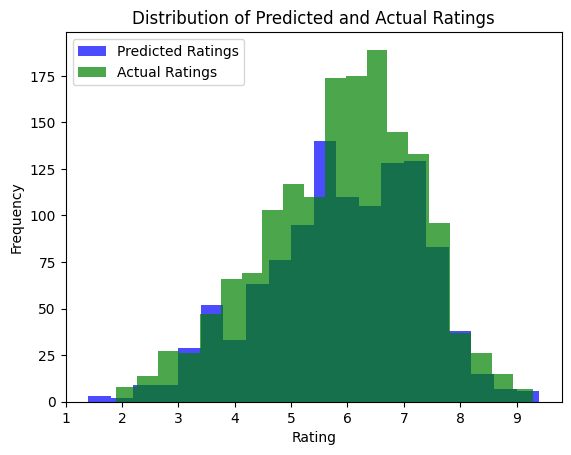

In [45]:
import matplotlib.pyplot as plt

plt.hist(y_pred, bins=20, color='blue', alpha=0.7, label='Predicted Ratings')
plt.hist(y_test, bins=20, color='green', alpha=0.7, label='Actual Ratings')
plt.legend()
plt.title('Distribution of Predicted and Actual Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


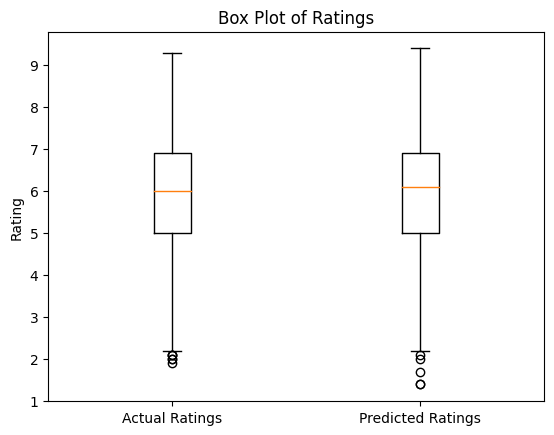

In [48]:
plt.boxplot([y_test, y_pred], labels=['Actual Ratings', 'Predicted Ratings'])
plt.title('Box Plot of Ratings')
plt.ylabel('Rating')
plt.show()


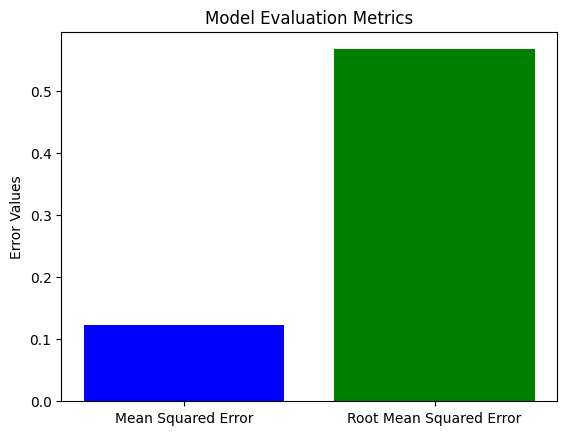

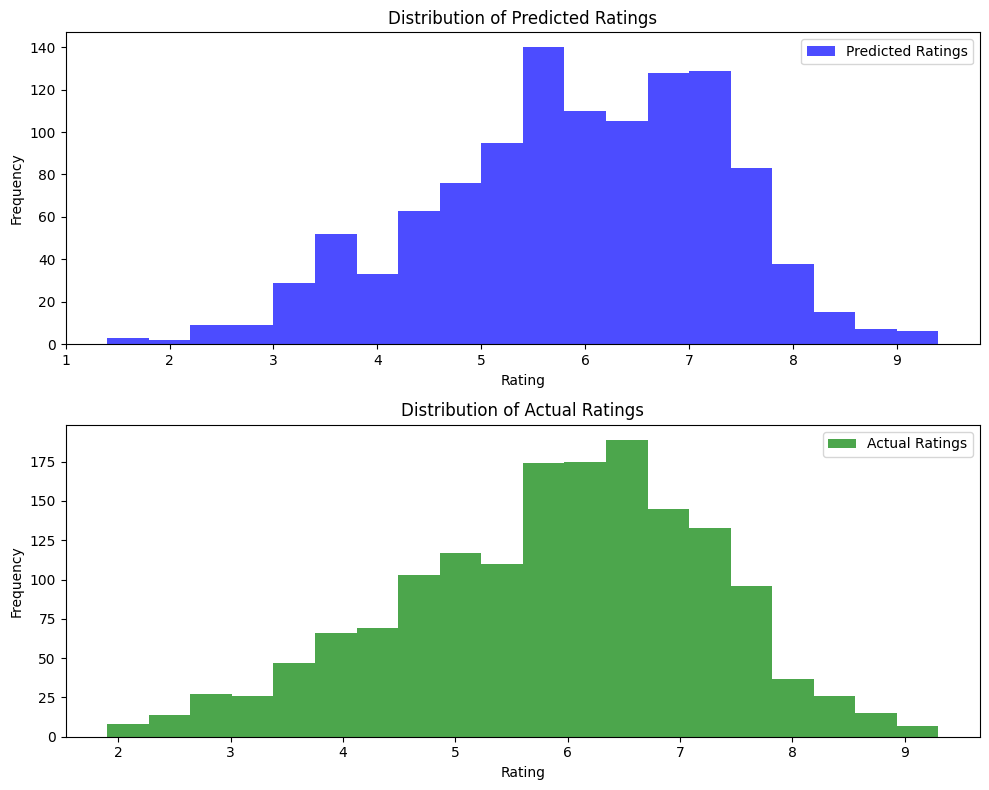

In [53]:
import matplotlib.pyplot as plt

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot histogram of predicted ratings
ax1.hist(y_pred, bins=20, color='blue', alpha=0.7, label='Predicted Ratings')
ax1.legend()
ax1.set_title('Distribution of Predicted Ratings')
ax1.set_xlabel('Rating')
ax1.set_ylabel('Frequency')

# Plot histogram of actual ratings
ax2.hist(y_test, bins=20, color='green', alpha=0.7, label='Actual Ratings')
ax2.legend()
ax2.set_title('Distribution of Actual Ratings')
ax2.set_xlabel('Rating')
ax2.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


(5851, 3) (5851,)


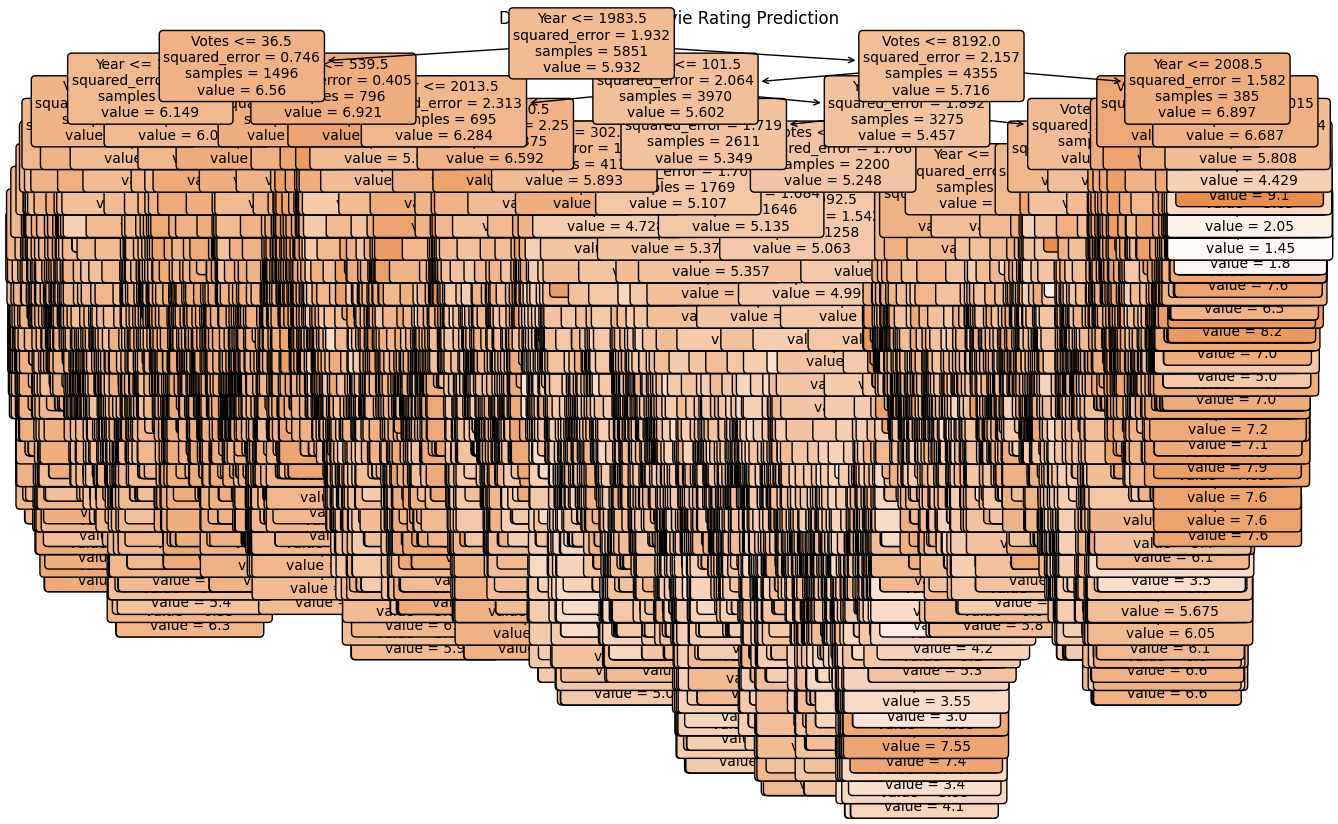

In [65]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Assuming df is your dataset
# Clean the 'Year' column by removing non-numeric characters
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Clean the 'Duration' column by converting it to string and then extracting the numeric part
df['Duration'] = df['Duration'].astype(str).str.extract('(\d+)').astype(float)

# Clean the 'Votes' column by removing non-numeric characters and converting to numeric
df['Votes'] = df['Votes'].replace('[^\d.]', '', regex=True).astype(float)

# Drop rows with NaN values
df = df.dropna(subset=['Year', 'Duration', 'Votes', 'Rating'])

# Extract relevant features and target variable
X_train = df[['Year', 'Duration', 'Votes']]
y_train = df['Rating']

# Check the shape of X_train and y_train
print(X_train.shape, y_train.shape)

# Instantiate the DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)

# Train the model with your training data
model.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=X_train.columns, rounded=True, fontsize=10)
plt.title('Decision Tree for Movie Rating Prediction')
plt.show()
